# Базовые понятия

https://habr.com/ru/company/avito/blog/571094/

## init

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [52]:
plt.rcParams["figure.figsize"] = (17,8)
plt.style.use('ggplot')

np.random.seed(42)

## one dataset

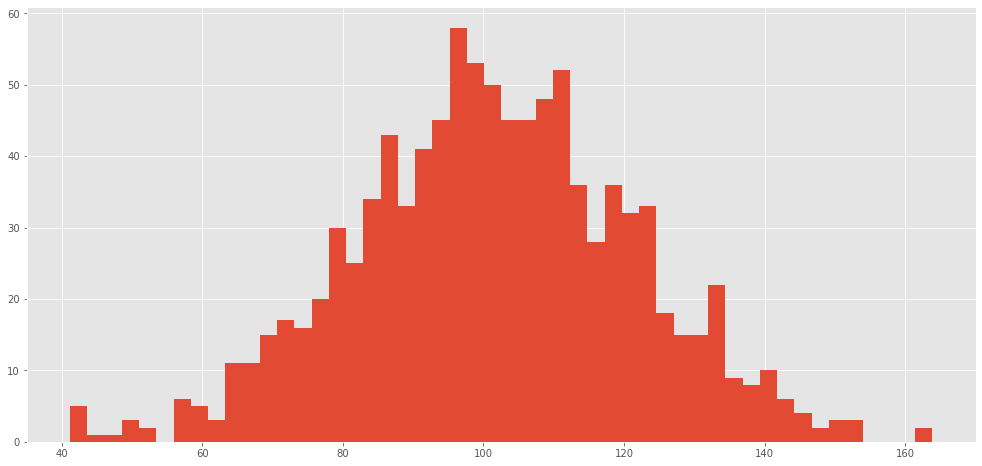

In [8]:
example_data = np.random.normal(loc=100, scale=20, size=1000)

plt.hist(example_data, bins=50);

In [12]:
def mean(data: np.array) -> float:
    """Среднее значение
    
    Ну тут всё просто: среднее арифметическое (сумма, деленная на объем выборки)
    """
    return np.sum(data) / data.shape[0]

mean(example_data), example_data.mean()

(101.41672474498311, 101.41672474498311)

In [55]:
def var(data: np.array, ddof: int = 0) -> float:
    """Дисперсия
    
    Берем отклонение от среднего, возводим в квадрат (иначе получится 0 в итоге), 
    и берем среднее по этому показателю.
    
    ddof - кол-во степеней свободы (для выборки берем 1, для генеральной совокупности - 0)
    """
    deviation = data - np.mean(data)
    n = data.shape[0]
    return np.sum(deviation * deviation) / (n - ddof)

var(example_data), example_data.var()

(397.56812776619677, 397.56812776619677)

Есть такая теоремка про расчет дисперсии:  
$$D[X] = E[X^2] - (E[X])^2$$  
где $D[X]$ - дисперсия выборки $X$, а $E[X]$ - среднее выборки $X$

In [57]:
def std(data: np.array, ddof: int = 0) -> float:
    """Стандартное отклонение
    
    Просто корень из дисперсии
    
    ddof - кол-во степеней свободы (для выборки берем 1, для генеральной совокупности - 0)
    """
    variance = data.var(ddof=ddof)
    return variance ** (1/2)

std(example_data), example_data.std()

(19.939110505892604, 19.939110505892604)

## two datasets

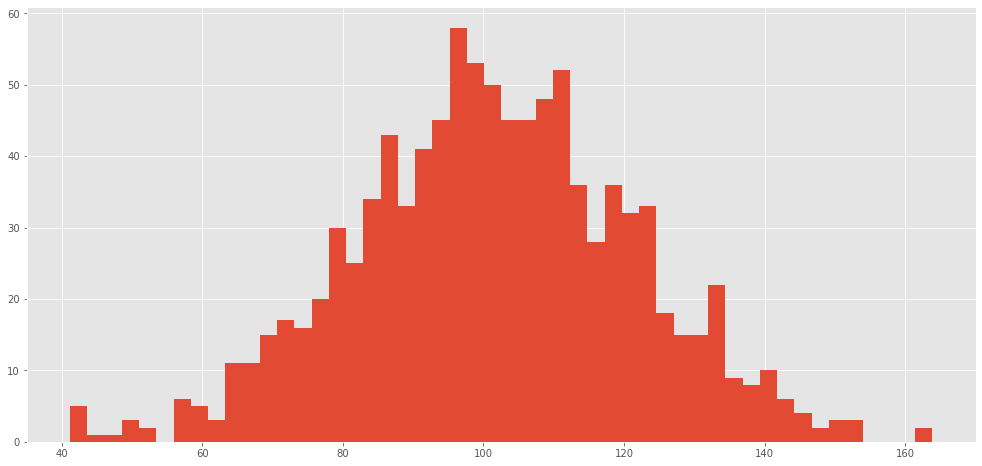

In [15]:
more_data = np.random.normal(loc=0, scale=10, size=1000)

plt.hist(example_data, bins=50);

In [64]:
def cov(data1: np.array, data2: np.array, ddof: int = 1) -> float:
    """Ковариация
    
    Берем отклонения от среднего одной выборки, отклонения от среднего другой выборки, и перемножаем.
    И берем среднее от этого числа. Как с дисперсией.
    
    ddof - кол-во степеней свободы (для выборки берем 1, для генеральной совокупности - 0)
    """
    n = min(data1.shape[0], data2.shape[0])
    
    deviation1 = data1[:n] - np.mean(data1[:n])
    deviation2 = data2[:n] - np.mean(data2[:n])
    
    return np.sum(deviation1 * deviation2) / (n - ddof)

cov(example_data, more_data), np.cov(example_data, more_data)[0,1]

(-2.1972078847286167, -2.1972078847286163)

Предположим, наши массивы с данными называются `a0` и `a1`.  
Функция `numpy.cov()` возвращает двумерный массив, в котором:  
* значение с индексом `[0][0]` представляет собой ковариацию между `a0` и `a0` (т.е. дисперсию `a0`);
* значение с индексом `[0][1]` - ковариация между `a0` и `a1`;
* значение с индексом `[1][0]` - ковариация между `a1` и `a0` (она равна ковариации между `a0` и `a1`); 
* значение с индексом `[1][1]` - ковариация между `a1` и `a1`  (т.е. дисперсия `a1`).

Ковариация выборки с самой собой - это дисперсия этой самой выборки:

In [61]:
ddof = 0
cov(example_data, example_data, ddof=ddof), example_data.var(ddof=ddof)

(397.56812776619677, 397.56812776619677)

In [65]:
def corr(data1: np.array, data2: np.array, ddof: int = 1) -> float:
    """Корреляция
    
    По-сути, это нормированная ковариация. Нормируем на корень из произведения дисперсий выборок.
    В итоге значения от -1 до 1.
    
    ddof - кол-во степеней свободы (для выборки берем 1, для генеральной совокупности - 0)
    """
    n = min(data1.shape[0], data2.shape[0])
    
    cov = np.cov(data1, data2, ddof=ddof)[0,1]
    
    var1 = data1[:n].var(ddof=ddof)
    var2 = data2[:n].var(ddof=ddof)
    
    return cov / (var1 * var2)**(1/2)

corr(example_data, more_data), np.corrcoef(example_data, more_data)[0,1]

(-0.011199378883997064, -0.011199378883997064)

Функция `np.corrcoef()` работает также, как и `numpy.cov()`: возвращает двумерный массив. Что там где - аналогично описанному выше про ковариацию.

Близкая к 1 по модулю корреляция указывает на линейную зависимость (если к -1 - обратная зависимость; если к +1 - прямая зависимость)